# Madrid AirBnB data analysis

In [84]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

First step is loading the data in a dataframe structure. For more information on the source of the data please check the README.md file

In [85]:
df = pd.read_csv('../data files/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.86,4.84,4.86,NaN,f,1,0,1,0,0.63
1,21853,https://www.airbnb.com/rooms/21853,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,NaN,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.30
2,24805,https://www.airbnb.com/rooms/24805,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,NaN,"The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,4.97,5.00,4.76,NaN,f,1,1,0,0,0.30
3,26825,https://www.airbnb.com/rooms/26825,20231215032748,2023-12-15,city scrape,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,NaN,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.72,4.73,4.77,NaN,f,1,0,1,0,1.18
4,30320,https://www.airbnb.com/rooms/30320,20231215032748,2023-12-15,previous scrape,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,1.05


In [166]:
#general overview of data
display(df.describe())
print('The dataframe has:\n{} rows\n{} columns'.format(df.shape[0], df.shape[1]))


,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.554300e+04,2.554300e+04,0.0,2.554300e+04,25532.000000,25532.000000,25543.000000,25543.000000,25543.000000,0.0,...,20213.000000,20214.000000,20215.000000,20212.000000,20211.000000,25543.000000,25543.000000,25543.000000,25543.000000,20176.000000
mean,4.159907e+17,2.023122e+13,NaN,2.172925e+08,34.318933,43.285916,40.421413,-3.694003,3.126727,NaN,...,4.666852,4.750049,4.759503,4.746825,4.555557,25.094272,19.962377,4.825353,0.269389,1.815256
std,4.324774e+17,6.336062e+00,NaN,1.833059e+08,96.321905,153.188924,0.023543,0.027755,1.920497,NaN,...,0.474094,0.431077,0.443542,0.394859,0.508168,58.120244,52.098890,27.827891,2.581711,1.917428
min,6.369000e+03,2.023122e+13,NaN,1.366000e+04,1.000000,1.000000,40.331397,-3.835330,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.114862e+07,2.023122e+13,NaN,4.087799e+07,1.000000,2.000000,40.409381,-3.707390,2.000000,NaN,...,4.570000,4.700000,4.720000,4.670000,4.450000,1.000000,0.000000,0.000000,0.000000,0.380000
50%,5.397609e+07,2.023122e+13,NaN,1.685328e+08,3.000000,4.000000,40.420240,-3.701070,2.000000,NaN,...,4.800000,4.860000,4.890000,4.880000,4.670000,3.000000,1.000000,0.000000,0.000000,1.190000
75%,8.698655e+17,2.023122e+13,NaN,3.991669e+08,18.000000,22.000000,40.431466,-3.685610,4.000000,NaN,...,4.950000,5.000000,5.000000,4.990000,4.840000,14.000000,7.000000,1.000000,0.000000,2.660000
max,1.046255e+18,2.023122e+13,NaN,5.507133e+08,2461.000000,5521.000000,40.535530,-3.545904,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,291.000000,291.000000,268.000000,39.000000,30.600000


The dataframe has:
25543 rows
75 columns


dtype('int64')

This dataframe has more than 25K entries. Each of them corresponding to an AirBnB listing that can be a full apartment, a single room or other.

Next an analysis of the NaN values is performed to see if some columns can be droped. Four columns ('description', 'bathrooms', 'bedrooms', 'calendar_updated') had only NaN values and are dropped. Also there are a few columns that are not relevant for the study ('listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'calendar_last_scraped', 'license'). These columns refer to urls of the listings, dates on when the data was scraped and from where it was scraped.

In [301]:
# NaN analysis

# Check columns with Nan values
nans_columns = df.isnull().mean()
print('Percentaje of missing values per column:\n{}'.format(nans_columns.sort_values(ascending=False).head(10)))

# Drop columns that are all NaN
df_new = df.dropna(how='all', axis=1)

# Drop not needed columns

columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'calendar_last_scraped', 'license']
df_new = df_new.drop(columns=columns_to_drop)
print('After droping the columns, the new dataframe has:\n{} rows\n{} columns'.format(df_new.shape[0], df_new.shape[1]))

Percentaje of missing values per column:
bedrooms                 1.000000
calendar_updated         1.000000
description              1.000000
bathrooms                1.000000
license                  0.891007
host_neighbourhood       0.595545
host_about               0.521630
neighborhood_overview    0.485691
neighbourhood            0.485691
host_location            0.303684
dtype: float64
After droping the columns, the new dataframe has:
25543 rows
59 columns


## Question 1: How are the listings distributed?
Which neighborhoods have the most listings? Who is the owner of the listings?

neighbourhood_group_cleansed
Centro                10878
Salamanca              1729
Chamberí               1716
Tetuán                 1416
Arganzuela             1277
Carabanchel             918
Retiro                  885
Ciudad Lineal           841
Chamartín               786
Puente de Vallecas      738
Name: count, dtype: int64
The top 10 neighbourhoods account for 82.93% of the total listings


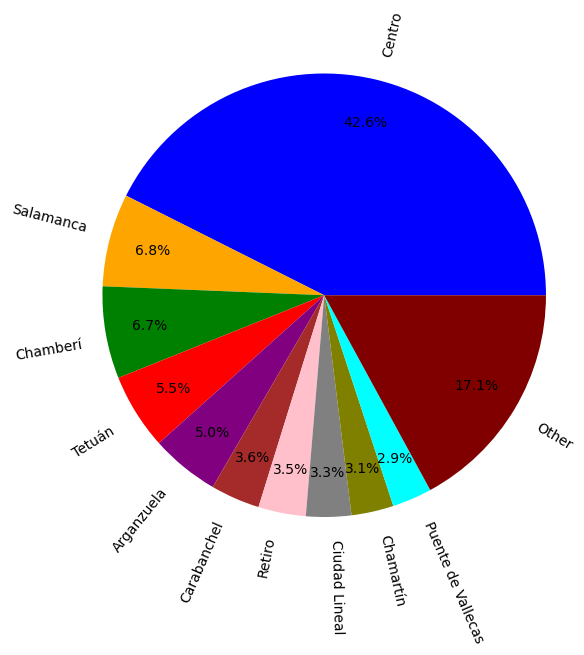

In [339]:
# Count how many listings are in each neighbourhood

nghood_count = df['neighbourhood_group_cleansed'].value_counts()
print(nghood_count.head(10))
print('The top 10 neighbourhoods account for {:2.2%} of the total listings'.format(nghood_count.head(10).sum()/df.shape[0]))

# Plot a pie chart with the percentaje of the top 10 neibourhoods

# Group the other neighbourhoods in an "other" category
pie_nghood = nghood_count
pie_nghood['Other'] = nghood_count[10:].sum()
pie_nghood = pie_nghood[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1]]

# Plot
plt.pie(pie_nghood.tolist(), labels=pie_nghood.keys().tolist(), autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'maroon'], pctdistance=0.8, radius=1.5, rotatelabels=True)
plt.show() 

In [186]:
owner_count = df['host_id'].value_counts()
display(owner_count.describe())

print('The top 10 owners account for {:2.2%} of the total listings'.format(owner_count.head(10).sum()/df.shape[0]))

count    12466.000000
mean         2.049013
std          6.871960
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        291.000000
Name: count, dtype: float64

int64
The top 10 owners account for 7.37% of the total listings


In [269]:
df['host_listings_count'].sum()

876231.0

In [203]:
bins = [0, 1, 10, 50, 100, 300]
owner_bins = pd.cut(owner_count.tolist(), bins=bins)
print(owner_bins.value_counts)

(0, 1]        9418
(1, 10]       2817
(10, 50]       202
(50, 100]       19
(100, 300]      10
Name: count, dtype: int64


In [241]:
host_types = ['single_property', 'small_owner', 'mid_owner', 'big_owner', 'massive_owner']
host_types_matrix = dict(pd.cut(owner_count, bins=bins, labels=host_types))

def change_dtype_dict(d):
    '''
    INPUT
    d -> a source dictionary to change datatype of key to int

    OUTPUP
    dict -> a new dictionary with the new datatype

    '''

    dict={}
    dict = {int(k):v for k,v in d.items()}
    
    return dict

host_types_matrix = change_dtype_dict(host_types_matrix)

df_new['host_type'] = df_new['host_id'].map(host_types_matrix)
df_new[['host_id','host_type']]



{377605855: 'massive_owner', 459532151: 'massive_owner', 291253690: 'massive_owner', 346367515: 'massive_owner', 518713670: 'massive_owner', 434208714: 'massive_owner', 471977881: 'massive_owner', 40877988: 'massive_owner', 107335103: 'massive_owner', 28038703: 'massive_owner', 107141654: 'big_owner', 438136382: 'big_owner', 217067249: 'big_owner', 460391145: 'big_owner', 391810099: 'big_owner', 444912851: 'big_owner', 220103569: 'big_owner', 28786243: 'big_owner', 1408525: 'big_owner', 9885245: 'big_owner', 112271726: 'big_owner', 112373304: 'big_owner', 394687867: 'big_owner', 480261102: 'big_owner', 106591951: 'big_owner', 529402573: 'big_owner', 99018982: 'big_owner', 418270816: 'big_owner', 430264712: 'big_owner', 494237478: 'mid_owner', 402683004: 'mid_owner', 901218: 'mid_owner', 204730281: 'mid_owner', 493916828: 'mid_owner', 52530675: 'mid_owner', 129000409: 'mid_owner', 31772865: 'mid_owner', 466052734: 'mid_owner', 90615844: 'mid_owner', 392790154: 'mid_owner', 201741093: 'm

C:\Users\antonio.torres\AppData\Local\Temp\ipykernel_4592\1415789510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['host_type'] = df_new['host_id'].map(host_types_matrix)


,host_id,host_type
0,13660,single_property
1,83531,small_owner
2,346366726,single_property
3,114340,single_property
4,130907,small_owner
...,...,...
25538,238061469,small_owner
25539,529402573,big_owner
25540,529402573,big_owner
25541,529402573,big_owner


host_type
single_property    9418
small_owner        8899
mid_owner          3976
massive_owner      1882
big_owner          1368
Name: count, dtype: int64


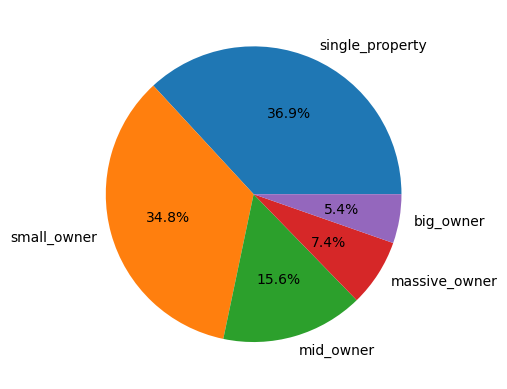

In [245]:
host_types_count = df_new['host_type'].value_counts()
print(host_types_count.head(10))

plt.pie(host_types_count.head(10).tolist(), labels=host_types_count.head(10).keys().tolist(), autopct='%1.1f%%')
plt.show()